In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import json
import collections

# Apply the default theme
sns.set_style("ticks")
sns.set_context("paper")

# Declare files.
files = {
    "0.95": "/data/rsg/nlp/fisch/projects/few-shot-cp/ckpts/chembl/k=16/conformal/q=0.95/val-trials=5000-results.jsonl",
    "0.90": "/data/rsg/nlp/fisch/projects/few-shot-cp/ckpts/chembl/k=16/conformal/q=0.90/val-trials=5000-results.jsonl",
    "0.80": "/data/rsg/nlp/fisch/projects/few-shot-cp/ckpts/chembl/k=16/conformal/q=0.80/val-trials=5000-results.jsonl",
    "0.70": "/data/rsg/nlp/fisch/projects/few-shot-cp/ckpts/chembl/k=16/conformal/q=0.70/val-trials=5000-results.jsonl",
    "0.60": "/data/rsg/nlp/fisch/projects/few-shot-cp/ckpts/chembl/k=16/conformal/q=0.60/val-trials=5000-results.jsonl",
    "0.50": "/data/rsg/nlp/fisch/projects/few-shot-cp/ckpts/chembl/k=16/conformal/q=0.50/val-trials=5000-results.jsonl",
    "0.40": "/data/rsg/nlp/fisch/projects/few-shot-cp/ckpts/chembl/k=16/conformal/q=0.40/val-trials=5000-results.jsonl",
    "0.30": "/data/rsg/nlp/fisch/projects/few-shot-cp/ckpts/chembl/k=16/conformal/q=0.30/val-trials=5000-results.jsonl",
    "0.20": "/data/rsg/nlp/fisch/projects/few-shot-cp/ckpts/chembl/k=16/conformal/q=0.20/val-trials=5000-results.jsonl",
    "0.10": "/data/rsg/nlp/fisch/projects/few-shot-cp/ckpts/chembl/k=16/conformal/q=0.10/val-trials=5000-results.jsonl",
    "0.05": "/data/rsg/nlp/fisch/projects/few-shot-cp/ckpts/chembl/k=16/conformal/q=0.05/val-trials=5000-results.jsonl",
}

# Each has row entries of the form:
# {"epsilon": eps, "lambda": lmb, "results": {"meta": {"acc": [avg, std, p84, p16], "eff": [...]}, "exact": {...}}}
# Here we only plot results for lambda = 0.
exact = collections.defaultdict(dict)
meta = collections.defaultdict(dict)
for q, fname in files.items():
    with open(fname, "r") as f:
        for line in f:
            trial = json.loads(line)
            key = round(1 - trial["epsilon"], 2)
            res = trial["result"]
            if trial["delta"] != 0:
                continue
            meta[q][key] = (res["meta"]["acc"][0], res["meta"]["eff"][0])
            if key not in exact:
                exact[key] = (res["exact"]["acc"][0], res["exact"]["eff"][0])

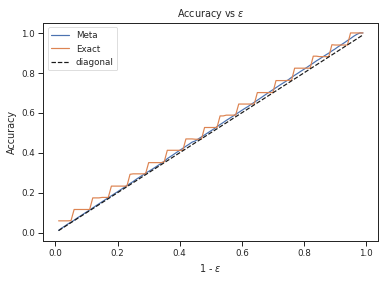

In [33]:
all_x = set()
y = {}
for q, values in meta.items():
    x = sorted(values.keys())
    all_x.update(x)
    for i in x:
        # There is some overlap in values of epsilon for quantile predictions,
        # we take the smaller of the overlaps.
        if i in y:
            y[i] = min(y[i], values[i][0])
        else:
            y[i] = values[i][0]
all_x = sorted(list(all_x))
y = [y[i] for i in all_x]
plt.plot(all_x, y, '-', label="Meta")

x = sorted(exact.keys())
y = [exact[i][0] for i in x]
plt.plot(x, y, '-', label="Exact")

plt.plot(all_x, all_x, "--", color="k", label="diagonal")
plt.xlabel("1 - $\epsilon$")
plt.ylabel("Accuracy")
plt.title("Accuracy vs $\epsilon$")
plt.legend()

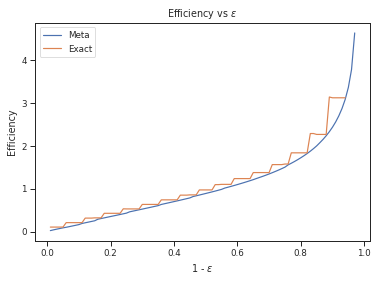

In [34]:
all_x = set()
y = {}
for q, values in meta.items():
    x = sorted(values.keys())
    all_x.update(x)
    for i in x:
        if i in y:
            y[i] = min(y[i], values[i][1])
        else:
            y[i] = values[i][1]
all_x = sorted(list(all_x))
y = [y[i] for i in all_x]
plt.plot(all_x, y, '-', label="Meta")

x = sorted(exact.keys())
y = [exact[i][1] for i in x]
# y = [min(i, 10) for i in y]
plt.plot(x, y, '-', label="Exact")
plt.xlabel("1 - $\epsilon$")
plt.ylabel("Efficiency")
plt.title("Efficiency vs $\epsilon$")
plt.legend()

In [55]:
print("=" * 50)
print("Meta:")
print("=" * 50)
for q, values in meta.items():
    qq = float(q)
    print("1-e: %2.2f | %2.2f\t%2.2f" % (qq, meta[q][qq][0], meta[q][qq][1]))

Meta:
1-e: 0.95 | 0.97	3.37
1-e: 0.90 | 0.92	2.44
1-e: 0.80 | 0.82	1.72
1-e: 0.70 | 0.72	1.35
1-e: 0.60 | 0.61	1.10
1-e: 0.50 | 0.51	0.89
1-e: 0.40 | 0.41	0.70
1-e: 0.30 | 0.31	0.53
1-e: 0.20 | 0.20	0.35
1-e: 0.10 | 0.10	0.18
1-e: 0.05 | 0.05	0.09


In [56]:
print("=" * 50)
print("Exact:")
print("=" * 50)
for q in meta.keys():
    values = exact[float(q)]
    qq = float(q)
    print("1-e: %2.2f | %2.2f\t%2.2f" % (qq, values[0], values[1]))

Exact:
1-e: 0.95 | 1.00	inf
1-e: 0.90 | 0.94	3.12
1-e: 0.80 | 0.82	1.84
1-e: 0.70 | 0.70	1.38
1-e: 0.60 | 0.64	1.24
1-e: 0.50 | 0.53	0.97
1-e: 0.40 | 0.41	0.74
1-e: 0.30 | 0.35	0.64
1-e: 0.20 | 0.23	0.43
1-e: 0.10 | 0.12	0.21
1-e: 0.05 | 0.06	0.11
